In [23]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import Operator, Statevector
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info import Statevector

import numpy as np
import matplotlib.pyplot as plt

import array_to_latex as a2l
from IPython.display import display, Markdown, Latex

In [5]:
backend = BasicAer.get_backend('unitary_simulator')

Here is the decomposition of the SYC gate correct up to a global phase:

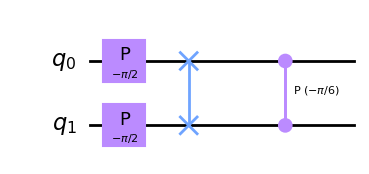

In [6]:
N = 2

qc_SYC = QuantumCircuit(N, name="SYC")

qc_SYC.p(-np.pi/2,0)
qc_SYC.p(-np.pi/2,1)
qc_SYC.swap(0, 1)
qc_SYC.cp(-np.pi/6,0,1)
SYC = qc_SYC.to_gate()

qc_SYC.draw(output='mpl')


In [77]:
job = backend.run(transpile(qc_SYC, backend))
gate = job.result().get_unitary(qc_SYC, decimals=2)
lat = a2l.to_ltx(gate, frmt='{:1}', arraytype='bmatrix', print_out=False, mathform=True)
print("Result of SYC(0,1):")
display(Latex(lat))

Result of SYC(0,1):


<IPython.core.display.Latex object>

Based on the output matrix and resulting circuit, we can conclude that ths SYC gate is effectively a 2 qubit SWAP gate with an applied phase. Next, let's try to see what a combination of SYC gates and see what it creates.

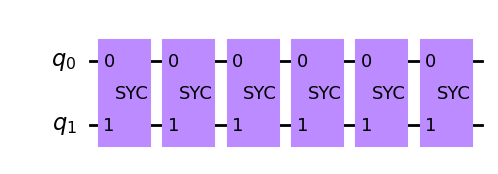

In [8]:
N=2
qc_cz = QuantumCircuit(N, name="SYC Creation of CZ")
qc_cz.append(SYC, [0 ,1])
qc_cz.append(SYC, [0 ,1])
qc_cz.append(SYC, [0 ,1])
qc_cz.append(SYC, [0 ,1])
qc_cz.append(SYC, [0 ,1])
qc_cz.append(SYC, [0 ,1])
qc_cz.draw(output='mpl')

In [75]:
job = backend.run(transpile(qc_cz, backend))
gate = job.result().get_unitary(qc_cz, decimals=2)
print("Result of SYC(0,1)^6 :")
lat = a2l.to_ltx(np.real(gate), frmt='{:1}', arraytype='bmatrix', print_out=False, mathform=True)
display(Latex(lat))

Result of SYC(0,1)^6 :


<IPython.core.display.Latex object>

From this matrix result above, we can see that SYC applied 6 times is equivalent to the CZ gate with a phase shift; We can correct this phase shift with the application of Z gates on the first and second qubits.

Next, we can translate this CZ gate creation of the SYC gate into a CNOT with the simple application of hadamard gates on both sides of qubit 1.

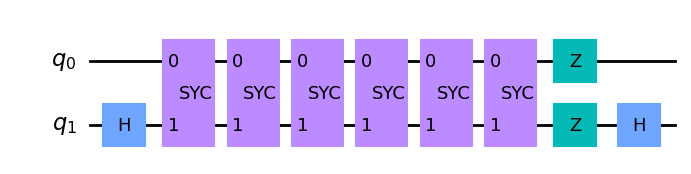

In [61]:
N=2
qc = QuantumCircuit(N, name="SYC_CNOT")
qc.h(1)
qc.append(SYC, [0 ,1])
qc.append(SYC, [0 ,1])
qc.append(SYC, [0 ,1])
qc.append(SYC, [0 ,1])
qc.append(SYC, [0 ,1])
qc.append(SYC, [0 ,1])
qc.z(0)
qc.z(1)
qc.h(1)

SYC_CNOT = qc.to_gate()
qc.draw(output='mpl')

In [74]:
job = backend.run(transpile(qc, backend))
gate = job.result().get_unitary(qc, decimals=2)
lat = a2l.to_ltx(np.real(gate), frmt='{:1}', arraytype='bmatrix', print_out=False, mathform=True)
print("Result of SYC(0,1)^6 :")
display(Latex(lat))

print()

qc_cnot = QuantumCircuit(N, name="CNOT (0,1)")
qc_cnot.cx(0,1)
job = backend.run(transpile(qc_cnot, backend))
lat = a2l.to_ltx(np.real(gate), frmt='{:1}', arraytype='bmatrix', print_out=False, mathform=True)
print("Result of CNOT(0,1):")
display(Latex(lat))

Result of SYC(0,1)^6 :


<IPython.core.display.Latex object>


Result of CNOT(0,1):


<IPython.core.display.Latex object>

Now that we have a CNOT gate composed of SYC gates, lets use a combination of them to create a CCNOT (Toffoili) gate.

From the paper "Five two-qubit gates are necessary for implmenting the Toffoli gate" (Physical Review A. 88 (1): 010304. arXiv:1301.3372), we can see that the optimal way to decompose a Toffoli gate is with 6 two qubit CNOT gates. A recreation of the circuit from the paper is shown here:

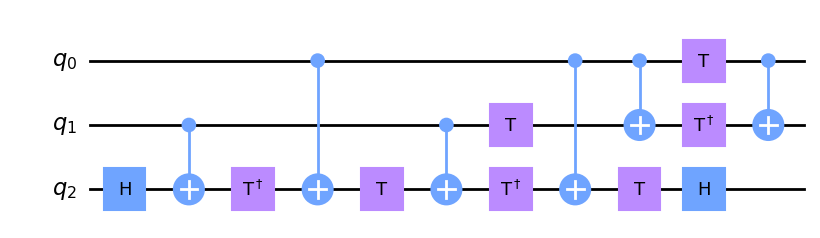

In [66]:
N = 3
qc = QuantumCircuit(N, name="CCNOT Decomposed")

qc.h(2)
qc.cnot(1,2)

qc.tdg(2)
qc.cnot(0, 2)
qc.t(2)
qc.cnot(1,2)
qc.tdg(2)
qc.cnot(0, 2)
qc.t(1)
qc.t(2)

qc.cnot(0, 1)
qc.h(2)

qc.t(0)
qc.tdg(1)
qc.cnot(0, 1)

qc.draw(output='mpl')

In [72]:
job = backend.run(transpile(qc, backend))
gate = job.result().get_unitary(qc, decimals=2)
lat = a2l.to_ltx(np.real(gate), frmt='{:1}', arraytype='bmatrix', print_out=False, mathform=True)
display(Latex(lat))

<IPython.core.display.Latex object>

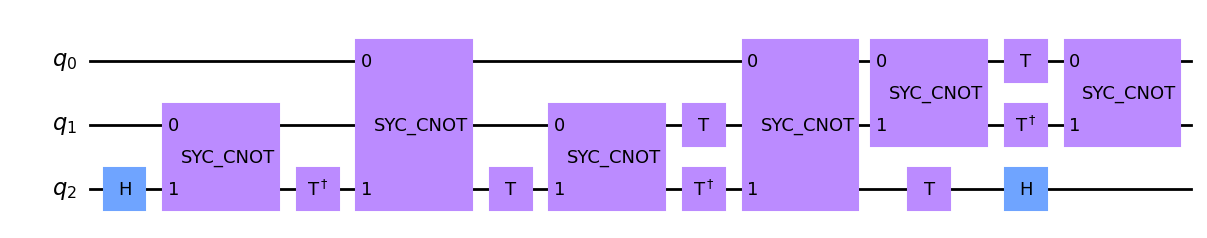

In [68]:
N = 3
qc = QuantumCircuit(N, name="CCNOT Decomposed")

qc.h(2)
qc.append(SYC_CNOT, [1,2])

qc.tdg(2)
qc.append(SYC_CNOT, [0, 2])
qc.t(2)
qc.append(SYC_CNOT, [1,2])
qc.tdg(2)
qc.append(SYC_CNOT, [0, 2])
qc.t(1)
qc.t(2)

qc.append(SYC_CNOT, [0, 1])
qc.h(2)

qc.t(0)
qc.tdg(1)
qc.append(SYC_CNOT, [0, 1])

qc.draw(output='mpl')

In [73]:
job = backend.run(transpile(qc, backend))
gate = job.result().get_unitary(qc, decimals=2)
lat = a2l.to_ltx(np.real(gate), frmt='{:1}', arraytype='bmatrix', print_out=False, mathform=True)
print("Recreation of CCNOT (Toffoli) using an SYC two qubit gates:")
display(Latex(lat))

Recreation of CCNOT (Toffoli) using an SYC two qubit gates:


<IPython.core.display.Latex object>

And there you have it. This is how you'd optimally create a CCNOT gate using SYC gates. The total used would be (6 CNOT SYC Gates) * (6 SYC Gates per CNOT) = **36 total SYC gates**